<h1><center>Data Collection - Spotify Track Features </center></h1>

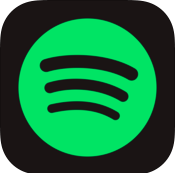

### Collecting Track Features

##### Feature Dictionary

|                                                                         Danceability                                                                         |                                                       Energy                                                       |                                                            Key                                                           |                                                                        Liveness                                                                        |                                      Acousticness                                      |                                                                                                              Duration                                                                                                             |                  Time Signature                  |
|:------------------------------------------------------------------------------------------------------------------------------------------------------------:|:------------------------------------------------------------------------------------------------------------------:|:------------------------------------------------------------------------------------------------------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:------------------------------------------------:|
|   How suitable a track is for dancing based on a  combination of musical elements including tempo,  rhythm stability, beat strength, and overall regularity. |          Energy is a measure from 0.0 to 1.0 and  represents a perceptual measure of intensity and activity.       |                                        Pitches using standard Pitch Class notation.                                      |   Detects the presence of an audience in the recording.  Higher liveness values represent an increased probability that  the track was performed live. | Acousticness:  A confidence measure from 0.0 to 1.0 of whether  the track is acoustic. |                                                                                                    Length of the track in Seconds                                                                                                 |    How many beats are in each bar (or measure).  |

|                Instruentalness                |                                                 Loudness                                                 |                                                        Mode                                                        |                     Speechiness                    |                                Tempo                                |                                                                                                          Valence                                                                                                          |            Track Number           |
|:---------------------------------------------:|:--------------------------------------------------------------------------------------------------------:|:------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------:|:-------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:---------------------------------:|
|  Predicts whether a track contains no vocals. |  The overall loudness of a track in decibels (dB).  Loudness values are averaged across the entire track |  Indicates the modality (major or minor) of a track,  the type of scale from which its melodic content is derived. |  Detects the presence of spoken words  in a track. |  The overall estimated tempo of a track in beats  per minute (BPM). |   A measure from 0.0 to 1.0 describing the musical  positiveness conveyed by a track. Tracks with high valence  sound more positive (e.g.cheerful), while tracks with low valence sound more negative (e.g. sad , angry). | Position of track on whole album  |

In [2]:
from spotipy.oauth2 import SpotifyClientCredentials
import json

import spotipy
import spotipy.util as util
import time
import sys

import pandas as pd
import numpy as np

### Client Authorization Token

In [3]:
scope = 'user-library-read'

if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print ("Usage: %s username" % (sys.argv[0],))
    sys.exit()

token = util.prompt_for_user_token(username,scope,client_id='23e7ed135658410698818505b543dabb',client_secret='a86d41a058e64658b83d7c5900dff17f',redirect_uri='http://localhost/')


client_credentials_manager = SpotifyClientCredentials(client_id= '23e7ed135658410698818505b543dabb',
                                                      client_secret= 'a86d41a058e64658b83d7c5900dff17f')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager , auth = token )

### Reading in my DataFrames

In [124]:
df = pd.read_csv('../00_Data/df_songs.csv')
riaa_df_good = pd.read_csv('../00_Data/riaa_songs_df.csv')


riaa_df = pd.read_csv('../00_Data/df_riaa.csv')

In [4]:
df_concat = pd.concat([df , riaa_df_good] , axis = 0 , join = 'outer' , ignore_index= True)
df_for_features = df_concat.drop_duplicates(subset = ['track','artist','release_date'])

### Get_Audio_Features Function

 - Function for extract audio features from Spotify using the Track ID & appending each features to its own list

In [4]:
def get_audio_features(track):
    info = sp.audio_features(track)[0]
    dance = info['danceability']
    energy = info['energy']
    key = info['key']
    loudness = info['loudness']
    mode = info['mode']
    speech = info['speechiness']
    acoust = info['acousticness']
    instru = info['instrumentalness']
    live = info['liveness']
    valence = info['valence']
    tempo = info['tempo']
    duration = info['duration_ms']
    time_signature = info['time_signature']
    track_num = sp.track(track)
    track_number = track_num['track_number']
    track_info = []
    track_info.append([dance , energy , key , loudness , mode , speech , acoust , 
                       instru , live , valence , tempo , duration , time_signature , track, track_number])
    return track_info

In [197]:
danceability_list = []
energy_list = []
key_list = []
loudness_list = []
mode_list = []
speechiness_list = []
acousticness_list = []
instrumentalness_list = []
liveness_list = []
valence_list = []
tempo_list = []
duration_ms_list = []
time_signature_list = []
track_number_list = []
track_ids = []

#### For loop :
   - Iterating through each track in my track list and applying my 'get_audio_features' function to it
#### Try & Excpet

In [277]:
for i in df_for_features.track_id:
    try:
        info = get_audio_features(i)
        for dance , energy , key , loudness , mode , speech , acoust , instru , live , valence , tempo , duration , time_signature, track , track_number in info:
            danceability_list.append(dance)
            energy_list.append(energy)
            key_list.append(key)
            loudness_list.append(loudness)
            mode_list.append(mode)
            speechiness_list.append(speech) 
            acousticness_list.append(acoust) 
            instrumentalness_list.append(instru) 
            liveness_list.append(live) 
            valence_list.append(valence) 
            tempo_list.append(tempo) 
            duration_ms_list.append(duration)  
            time_signature_list.append(time_signature)
            track_ids.append(track)
            track_number_list.append(track_number)
    except:
        time.sleep(1)
        scope = 'user-library-read'

        if len(sys.argv) > 1:
            username = sys.argv[1]
        else:
            print ("Usage: %s username" % (sys.argv[0],))
            sys.exit()

        token = util.prompt_for_user_token(username,scope,client_id='23e7ed135658410698818505b543dabb',client_secret='a86d41a058e64658b83d7c5900dff17f',redirect_uri='http://localhost/')


        client_credentials_manager = SpotifyClientCredentials(client_id= '23e7ed135658410698818505b543dabb',
                                                              client_secret= 'a86d41a058e64658b83d7c5900dff17f')
        sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager , auth = token )

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


### Creating Dictionary of my data to creat a clean DataFrame

In [280]:
df_dict_features = {'danceability' :danceability_list ,
'energy' : energy_list,
'key' : key_list,
'loudness' : loudness_list,
'mode' : mode_list,
'speechiness' : speechiness_list,
'accousticness' : acousticness_list,
'instrumentalness' : instrumentalness_list,
'liveness' : liveness_list,
'valence' : valence_list,
'tempo' : tempo_list,
'duration_ms' : duration_ms_list,
'time_signature' : time_signature_list,
'track': track_ids,
'track_number': track_number_list}

In [281]:
df_features = pd.DataFrame(df_dict_features)

In [283]:
df_features.to_csv('./Data/df_features_good.csv',index = False)

#### Setting Index

- Setting the index to track ID for my original data frame & my track feature data frame for an easy and efficient merge

In [340]:
df_left = df_for_features.set_index(df_for_features.track_id)
df_right = df_features.set_index(df_features.track )

In [341]:
df_merged = df_left.merge(df_right , left_on = df_left.index , right_on= df_right.index)

#### Dropping duplicate columns & renaming columns for send off to CSV

In [343]:
df_merged.drop(columns = ['track_y','track_id'] , inplace= True)

In [346]:
df_merged.rename(columns = {'key_0': 'track_id', 'track_x' : 'track', 'total_tracks': 'total_album_tracks'} , inplace = True)

In [347]:
df_merged.to_csv('../00_Data/df_merged.csv',index = False)